<a href="https://colab.research.google.com/github/bindhu520/Safe-driving-Challenge-ML-PROECT-/blob/master/SDC(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.svm import LinearSVC # Linear Support Vector Classigication
from sklearn.svm import NuSVC

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

In [0]:
train = pd.read_csv('/content/drive/My Drive/train.csv')
test = pd.read_csv('/content/drive/My Drive/test.csv')
#sol = pd.read_csv('/content/drive/My Drive/fastai-v3/data/bears/featuretrain.csv')
exp = pd.read_csv('/content/drive/My Drive/example_submission.csv')

In [0]:
train.info()
test.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [0]:
sum(train['IsAlert'] == 0)

254544

First Model



Data preprocessing

In [0]:
new_df = pd.DataFrame() 

In [0]:
noalert = train.index[train['IsAlert'] == 0]
turnnoalert = train.iloc[noalert-1][train['IsAlert'] == 1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [0]:
for i in turnnoalert.index: # Return 500ms before and after the moment
    new_df = new_df.append(train[i-5:i+6])

In [0]:
new_df = new_df.drop_duplicates() 

In [0]:
new_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
604323,510,1193,1,32.0303,7.68265,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,323,2,2,1,64,0.0,91.40,0.175,240,3.01875,0,1792,0,29.9,0,4,15.8303
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604314,510,1184,0,31.9667,9.17322,688,87.2093,0.089515,684,87.7193,0,17.807,222.11,0,0,0.016379,327,2,2,1,64,0.0,90.94,0.175,240,3.01875,0,1780,0,29.5,0,4,15.8482
604315,510,1185,0,31.9291,15.50140,688,87.2093,0.089515,684,87.7193,0,17.807,222.11,0,0,0.016379,327,2,2,1,64,0.0,90.91,0.175,240,3.01875,0,1777,0,29.5,0,4,15.8472
604316,510,1186,0,31.9820,8.30669,688,87.2093,0.089515,684,87.7193,0,17.807,222.11,0,0,0.016379,327,2,2,1,64,0.0,91.00,0.280,240,3.01875,0,1795,0,29.5,0,4,15.8759
604317,510,1187,0,31.9516,9.91952,688,87.2093,0.089515,684,87.7193,0,17.807,222.11,0,0,0.016379,327,2,2,1,64,0.0,91.01,0.175,240,3.01875,0,1784,0,29.5,0,4,15.8589



# Feature Engineering


In [0]:
pcadata = new_df.drop(columns = ['TrialID', 'ObsNum', 'IsAlert']) # Drop unneccessary columns


# Standarization

In [0]:
X_scaled = preprocessing.scale(pcadata) 
pcadata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37421 entries, 604323 to 604318
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      37421 non-null  float64
 1   P2      37421 non-null  float64
 2   P3      37421 non-null  int64  
 3   P4      37421 non-null  float64
 4   P5      37421 non-null  float64
 5   P6      37421 non-null  int64  
 6   P7      37421 non-null  float64
 7   P8      37421 non-null  int64  
 8   E1      37421 non-null  float64
 9   E2      37421 non-null  float64
 10  E3      37421 non-null  int64  
 11  E4      37421 non-null  int64  
 12  E5      37421 non-null  float64
 13  E6      37421 non-null  int64  
 14  E7      37421 non-null  int64  
 15  E8      37421 non-null  int64  
 16  E9      37421 non-null  int64  
 17  E10     37421 non-null  int64  
 18  E11     37421 non-null  float64
 19  V1      37421 non-null  float64
 20  V2      37421 non-null  float64
 21  V3      37421 non-null  int64

# Principle Component Analysis

In [0]:
pca=PCA() 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 

In [0]:
#let's check the shape of X_pca array
print ("shape of X_pca", X_pca.shape)

shape of X_pca (37421, 30)


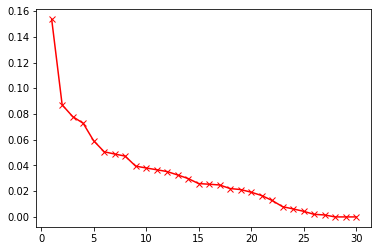

In [0]:
#%%
# Scree Plot
y = pca.explained_variance_ratio_

x = np.array([i for i in range(1, len(y)+1)])

plt.plot(x, y, 'r-x')

In [0]:
# Filter principle components
sum(pca.explained_variance_ratio_[:14])
X_pca = X_pca[:,:14] # Slice the first 14 features
X_pca.shape 

(37421, 14)

In [0]:
X_pca # Training features
new_df.IsAlert # Target features

604323    1
604324    1
604325    1
604326    1
604327    1
         ..
604314    0
604315    0
604316    0
604317    0
604318    1
Name: IsAlert, Length: 37421, dtype: int64

Modeling

In [0]:
# Logistic Regression Cross Validation
clf_CV = LogisticRegressionCV(cv=10, random_state=0, solver = 'liblinear') # Model Setting
clf_CV.fit(X_pca, new_df.IsAlert) # Model Fitting

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [0]:
# Evalution

clf_CV.score(X_pca, new_df.IsAlert) 


0.6460276315437856

In [0]:
# Confustion matrix evaluation

clf_cv_pred = clf_CV.predict(X_pca)
len(clf_cv_pred == 1)
#sum(clf_cv_pred == 0)

37421

In [0]:
sum(clf_cv_pred == 0)

5276

In [0]:
confusion_matrix(new_df.IsAlert, clf_cv_pred)
sum(new_df.IsAlert == 1)


21319

In [0]:
roc_auc_score(new_df.IsAlert, clf_cv_pred)


0.5978791659850288

Try Another Models

In [0]:
# Cross Validated Naive Bayes Model
skf = StratifiedKFold(n_splits=10)
params = {}
nb = GaussianNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, new_df.IsAlert, random_state = 42)


In [0]:
gs.fit(x_train, y_train)
gs.cv_results_
gs.score(X_pca, new_df.IsAlert)
gs_predict = gs.predict(X_pca)

In [0]:
confusion_matrix(new_df.IsAlert, gs_predict)


array([[ 4026, 12076],
       [ 2181, 19138]])

In [0]:
roc_auc_score(new_df.IsAlert, gs_predict)
#nb.fit(x_train, y_train)
#nb.score(x_test, y_test)

0.5738639710706295

In [0]:
# Cross Validated  Random Forest
grid_forest = RandomForestClassifier(random_state = 42)
hyperparams = [{'n_estimators':[5, 10 ,50]}]
grid_search = GridSearchCV(grid_forest, hyperparams, cv = 10, scoring = 'neg_mean_squared_error')


In [0]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [0]:
selected_model = grid_search.best_estimator_

In [0]:
print ('Grid winner', selected_model.score(x_test, y_test))
selected_model.score(X_pca, new_df.IsAlert)

Grid winner 0.7658187259512612


0.9414499879746666

In [0]:
randomfpred = grid_search.predict(X_pca)
confusion_matrix(new_df.IsAlert, randomfpred)

array([[14535,  1567],
       [  624, 20695]])

In [0]:
roc_auc_score(new_df.IsAlert, randomfpred)

0.9367066154890232

In [0]:
import pickle
from joblib import dump, load


In [0]:
dump(grid_search, 'randomforest.joblib')
rf_2 = load('randomforest.joblib') 
rf_2.best_estimator_.score(X_pca, new_df.IsAlert)
randomfpred_2 = rf_2.predict(X_pca)

In [0]:
confusion_matrix(new_df.IsAlert, randomfpred_2)
roc_auc_score(new_df.IsAlert, randomfpred_2)

0.9367066154890232

# Support Vector Machine & Neural Network

In [0]:
lisvc = LinearSVC(random_state=42, tol=1e-5)
svcgridsearch = GridSearchCV(lisvc, cv = skf, param_grid = params, return_train_score = True)
svcgridsearch.fit(x_train, y_train) # Failed to convergence


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=1e-05, verbose=0),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [0]:
svcgridsearch.cv_results_
svcgridsearch.score(X_pca, new_df.IsAlert)
lisvc_predict = svcgridsearch.predict(X_pca)


In [0]:
confusion_matrix(new_df.IsAlert, lisvc_predict)

array([[ 4008, 12094],
       [ 1216, 20103]])

In [0]:
roc_auc_score(new_df.IsAlert, lisvc_predict)

0.595937427932066

In [0]:
#accuracy 64.43%

# Epsilon - Support Vecto Regression

In [0]:
from sklearn.svm import SVR

In [0]:
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)

In [0]:
svrgridsearch = GridSearchCV(svr, cv = skf, param_grid = params, return_train_score = True)
svrgridsearch.fit(x_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.2, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [0]:
svrgridsearch.cv_results_
svrgridsearch.score(X_pca, new_df.IsAlert)
svr_predict = svrgridsearch.predict(X_pca)

In [0]:
svr_predict


array([0.76921565, 0.7748565 , 0.78159718, ..., 0.7642754 , 0.77192306,
       0.7838266 ])

In [0]:
roc_auc_score(new_df.IsAlert, svr_predict)

0.7192060139804022

# C - Support Vector Regression

In [0]:
from sklearn.svm import SVC 

In [0]:
svc = SVC(gamma='auto')
svcgridsearch = GridSearchCV(svc, cv = skf, param_grid = params, return_train_score = True)
svcgridsearch.fit(x_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [0]:
svcgridsearch.cv_results_
svcgridsearch.score(X_pca, new_df.IsAlert)
svc_predict = svcgridsearch.predict(X_pca)

In [0]:
confusion_matrix(new_df.IsAlert, svc_predict)

array([[ 4358, 11744],
       [  398, 20921]])

In [0]:
roc_auc_score(new_df.IsAlert, svc_predict)

0.6259904078244471

# Neural Network

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
nn1 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nngridsearch = GridSearchCV(nn1, cv = skf, param_grid = params, return_train_score = True)
nngridsearch.fit(x_train, y_train) 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=1e-05,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(5, 2),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False

In [0]:
nngridsearch.cv_results_
nngridsearch.score(X_pca, new_df.IsAlert)
nn_predict = nngridsearch.predict(X_pca)


In [0]:
confusion_matrix(new_df.IsAlert, nn_predict)

array([[ 4205, 11897],
       [ 1205, 20114]])

In [0]:
roc_auc_score(new_df.IsAlert, nn_predict)

0.6023126662815139